De acuerdo al cuestionario del lunes, ustedes respondieron "Respuestas", usando Respuestas y Random_nums responde la siguientes preguntas

In [82]:
# Importación de librerías
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [67]:
# Datos sucios
Respuestas = ["6","pi","Lentes","5","8","11",
              "10000000","3.1416","1","8","53",
              "58","5","raízde2","8","99","$",
              "Pi","6","9","10","7",".-.","11",
              "70","13","10","28","159","37"]

np.random.seed(42)

Random_nums = np.random.randint(0,10000000,len(Respuestas))


Hipótesis: La mediana de esos números es 10.

Usando boostraping ¿qué nivel de confianza debes usar para que se acepte la hipótesis?

Limpieza de los datos

In [79]:
# Convertimos las respuestas en un dataframe

df = pd.DataFrame(Respuestas)
df.rename(columns={0: "Datos"}, inplace =  True)
df

,Datos
0,6
1,pi
2,Lentes
3,5
4,8
5,11
6,10000000
7,3.1416
8,1
9,8


In [91]:
# Iteramos sobre los elementos del dataframe y forzamos su conversión hacia un número flotante, 
# En caso de que tire error, anexamos un NaN para después hacer la limpieza con dropna()

df_limpio = df.copy()

for i, v in df_limpio['Datos'].iteritems():
  try: 
    if v == 'pi' or v == 'Pi' or v == 'PI':
       df_limpio['Datos'][i] = np.pi  
    else:
       df_limpio['Datos'][i] = float(v)
  except:
    df_limpio['Datos'][i] = np.nan

df_limpio = df_limpio.dropna().reset_index().drop(columns = 'index')
df_limpio

,Datos
0,6.0
1,3.141593
2,5.0
3,8.0
4,11.0
5,10000000.0
6,3.1416
7,1.0
8,8.0
9,53.0


In [92]:
# Otra manera es convertir el dataframe en una serie de pandas e iterar sobre sus índices
df2 = pd.Series(df["Datos"])
for i in range(len(df2)):
  try: 
    if df2[i] == 'pi' or df2[i] == 'Pi' or df2[i] == 'PI':
      df2[i] = np.pi  
    else:
      df2[i] = float(df2[i])
  except:
    df2[i] = None

df2 = df2[df2.notnull()].dropna().reset_index().drop(columns = 'index')
df2

,Datos
0,6.0
1,3.141593
2,5.0
3,8.0
4,11.0
5,10000000.0
6,3.1416
7,1.0
8,8.0
9,53.0


In [179]:
# Calculamos el intervalo de confianza del 95% para la mediana.

stats.t.interval(alpha=0.95,
                 df=len(df_limpio["Datos"])-1,
                 loc=np.median(df_limpio["Datos"]),
                 scale = stats.sem(df_limpio["Datos"])
                 )

(-792118.712052589, 792137.712052589)

Por lo tanto, con un intervalo de confianza del 95% podemos decir que la mediana se encuentra entre (-792118.712052589, 792137.712052589), por lo que no se rechaza la hipótesis de que la mediana tiene un valor de 10.

Ahora planteamos una nueva prueba de hipótesis de que la mediana es igual a 10 para un nuevo conjunto de datos

In [101]:
# Generamos un nuevo vector de datos sumando números aleatorios a las respuestas limpias

np.random.seed(42)

Random_nums = np.random.randint(0,10000000,len(df_limpio))

datos = np.add(np.array(df_limpio["Datos"]), Random_nums)
datos

array([6423394.0, 6550637.1415926535, 4304577.0, 2234497.0, 9958625.0,
       19524682.0, 7204215.1416, 9628520.0, 4472479.0, 4523722.0,
       7404910.0, 4981510.0, 1766899.0, 4521472.0, 6019880.1415926535,
       3344775.0, 9180360.0, 103365.0, 1262759.0, 9784644.0, 5664859.0,
       9695992.0, 9305658.0, 5743094.0, 6113949.0, 4721376.0],
      dtype=object)

In [105]:
# Calculamos el intervalo de confianza del 95% para la mediana.

stats.t.interval(alpha=0.95,
                 df=len(datos)-1,
                 loc=np.median(datos),
                 scale=stats.sem(datos)) 

(4326059.39009379, 7436914.751498863)

In [141]:
# Calculamos el intervalo de confianza del 99.99999617632% para la mediana.

stats.t.interval(alpha=0.9999999617632,
                 df=len(datos)-1,
                 loc=np.median(datos),
                 scale=stats.sem(datos)) 

(9.362230250611901, 11762964.779362403)

En consecuencia, para el conjunto de números aleatorios definido, se necesita de un intervalo de condianza del 99.99999617632% para afirmar no rechazar que la hipótesis de que la mediana tiene un valor de 10.

# Obten los siguientes estadísticos

Media

Mediana

Desviación est.

Min

Max

In [170]:
df_limpio.mean()[0]

384639.6701840503

In [171]:
df_limpio.median()[0]

9.5

In [172]:
df_limpio.std()[0]

1961156.398419381

In [173]:
df_limpio.min()[0]

1.0

In [174]:
df_limpio.max()[0]

10000000.0

# Outliers

Utilizando el z-score y el rango intercuartil, ¿Cuáles son los outiers de los datos? Grafícalo con un diagrama de caja

### Rango intercuartil

In [182]:
# Calculamos el rango intercuartil

IQR = np.percentile(df_limpio, 75) - np.percentile(df_limpio, 25)
IQR

28.75

In [188]:
# Calculamos el rango mínimo y máximo con IQR*1.5
IQR_15 = IQR*1.5
IQR_thres = (np.percentile(df_limpio,25)-IQR_15, np.percentile(df_limpio,75)+IQR_15)
IQR_thres

(-37.125, 77.875)

In [193]:
# Definimos un for para detectar y almacenar los outliers en una lista

outlier_IQR = []
for i in df_limpio["Datos"]:
    if i < IQR_thres[0] or i > IQR_thres[1]:
        outlier_IQR.append(i)

outlier_IQR

[10000000.0, 99.0, 159.0]

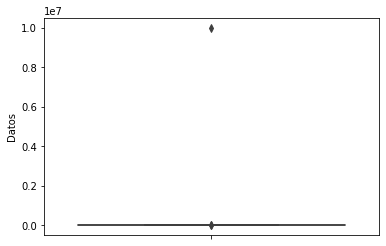

In [186]:
# Graficamos un bloxplot

sns.boxplot(y = df_limpio["Datos"])

In [ ]:
# El princpal outlier es el 10000000

In [194]:
df_limpio

,Datos
0,6.0
1,3.141593
2,5.0
3,8.0
4,11.0
5,10000000.0
6,3.1416
7,1.0
8,8.0
9,53.0


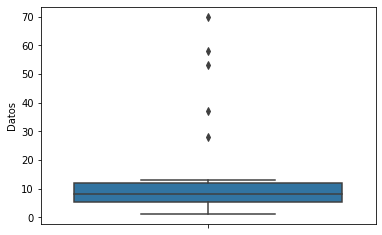

In [195]:
# Sólo por diversión, graficamos el boxplot sin los outliers identificados:

df_limpio_sin_outliers = df_limpio.copy()

df_limpio_sin_outliers = df_limpio_sin_outliers.drop(axis=0, index=[5, 13, 24])

sns.boxplot(y = df_limpio_sin_outliers["Datos"])

Al eliminar los outliers, el rango IQR cambia, por lo que en el nuevo boxplot se identifican nuevos outliers.

### Z-score

In [198]:
# Identificación de outliers usando la metodología del Z-score

threshold = 2.0
mean = df_limpio.mean()
std = df_limpio.std()
outlier = []
for i in df_limpio["Datos"]:
    z = ((i-mean)/std)[0]
    if z > threshold or z < - threshold:
        outlier.append(i)
print('', outlier)

 [10000000.0]


Pregunta Extra (usnado p-value): ¿Si lanzo una moneda 6 veces y las 6 veces sale "Águila", es un evento "normal"?

In [204]:
# Se lanza la moneda 6 veces y las seis veces sale "Águila", por lo tanto su probabilidad es:
p_aguila = (1/2)**6
p_aguila

0.015625

In [206]:
# Ahora, el p-value es la suma de eventos raros, el otro evento raro equivalente es lanzar la moneda 6 veces y obtener "Sol":
p_sol = (1/2)**6

#Entonces, el value es la suma de los dos eventos anteriores:
p_value = p_aguila + p_sol
p_value

0.03125

Ahora, considerando un intervalo de confianza del 95%, se observa que el p-value calculado de 0.03125 es menor al alpha de 0.05, por lo que podemos concluir que lanzar una moneda 6 veces y obtener solamente "Águila" no es un evento basado en el azar y, en consecuencia, NO puede ser considerado normal.